In [1]:
import pandas as pd

In [2]:
#Import cleaned UNR IDD dataset with network traffic
#Information about the data

#Label (names of attacks) labeled with numbers:
#"Blackhole" = 1, "Diversion"= 2, "Normal"= 3,"Overflow"= 4, "PortScan"= 5, "TCP-SYN"= 6

#Binary Label labeled with numbers: 1 = Attack, 2 = Normal

df = pd.read_csv("/Users/sinaronke/Predict Binary Label (Attack or Normal)/UNR_IDD_cleaned.csv")
df.head()

,Switch ID,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Packets,Delta Received Bytes,Delta Sent Bytes,...,Total Load/Rate,Total Load/Latest,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,Active Flow Entries,Packets Looked Up,Packets Matched,Label,Binary Label
0,12,1,132,9181,6311853,238,46,0,0,280,...,0,0,0,0,0,9,767,688,6,1
1,12,2,187,6304498,15713,171,46,146,5908166,5969,...,0,0,0,0,0,9,767,688,6,1
2,12,3,235,6311567,8030,58,46,2,278,280,...,0,0,0,0,0,9,767,688,6,1
3,12,4,59,7878,16439,182,46,2,278,280,...,0,0,0,0,0,9,767,688,6,1
4,10,1,188,6304547,16497,183,46,0,0,280,...,0,0,0,0,0,7,489,403,6,1


In [3]:
#"Blackhole" = 1, "Diversion"= 2, "Normal"= 3,"Overflow"= 4, "PortScan"= 5, "TCP-SYN"= 6
df["Label"].value_counts(dropna=False)

5    9498
6    8952
1    8397
2    5599
3    3723
4    1007
Name: Label, dtype: int64

In [4]:
#1 = Attack, 2 = Normal
df["Binary Label"].value_counts(dropna=False)

1    33453
2     3723
Name: Binary Label, dtype: int64

In [5]:
#37176 rows and 23 columns including Label and Binary Label
df.shape

(37176, 23)

In [6]:
#UNR IDD mainly includes network port statistics. These refer to the observed port metrics recorded in switch/router ports within a networking environment. 
#mean/average
#std = Standard deviation
#min, max 
#median and percentiles
#Find some extraordinary values in Received Packets, Sent Packets, Active Flow entries, Delta Received Packets
df.describe()

,Switch ID,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Packets,Delta Received Bytes,Delta Sent Bytes,...,Total Load/Rate,Total Load/Latest,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,Active Flow Entries,Packets Looked Up,Packets Matched,Label,Binary Label
count,37176.000000,37176.000000,37176.000000,3.717600e+04,3.717600e+04,37176.000000,37176.000000,37176.000000,3.717600e+04,3.717600e+04,...,3.717600e+04,3.717600e+04,3.717600e+04,3.717600e+04,3.717600e+04,37176.000000,3.717600e+04,3.717600e+04,37176.000000,37176.000000
mean,6.747767,2.172100,21525.385356,2.643443e+07,2.445996e+07,33404.275769,911.573811,195.881832,3.423435e+05,3.132392e+05,...,2.053929e+04,5.176508e+05,2.053929e+04,5.176508e+05,2.053929e+04,88.915671,1.003406e+05,1.002214e+05,3.658113,1.100145
std,3.770326,1.015295,65081.448974,3.695931e+07,3.431224e+07,88404.917445,981.981662,1090.497886,1.202285e+06,1.151641e+06,...,1.074924e+05,1.868618e+06,1.074924e+05,1.868618e+06,1.074924e+05,791.519953,2.340230e+05,2.340217e+05,1.958910,0.300198
min,1.000000,1.000000,9.000000,7.860000e+02,5.705000e+03,41.000000,26.000000,0.000000,0.000000e+00,2.780000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000,8.700000e+01,3.700000e+01,1.000000,1.000000
25%,3.000000,1.000000,328.000000,9.038925e+04,5.616025e+04,343.000000,136.000000,2.000000,2.780000e+02,2.800000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000,2.366000e+03,2.268000e+03,2.000000,1.000000
50%,7.000000,2.000000,1165.000000,1.263052e+07,1.262634e+07,1231.500000,261.000000,4.000000,5.560000e+02,5.560000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000,7.492000e+03,7.361000e+03,4.000000,1.000000
75%,10.000000,3.000000,3414.000000,3.783140e+07,3.176382e+07,3962.250000,1747.000000,6.000000,7.880000e+02,7.590000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000,2.344950e+04,2.322600e+04,5.000000,1.000000
max,12.000000,4.000000,352772.000000,2.715925e+08,2.392430e+08,421598.000000,3317.000000,15695.000000,6.647966e+06,6.647970e+06,...,2.004388e+06,2.606759e+07,2.004388e+06,2.606759e+07,2.004388e+06,9987.000000,1.012574e+06,1.012439e+06,6.000000,2.000000


Binary Label
1    [[AxesSubplot(0.125,0.777333;0.158163x0.102667...
2    [[AxesSubplot(0.125,0.777333;0.158163x0.102667...
dtype: object

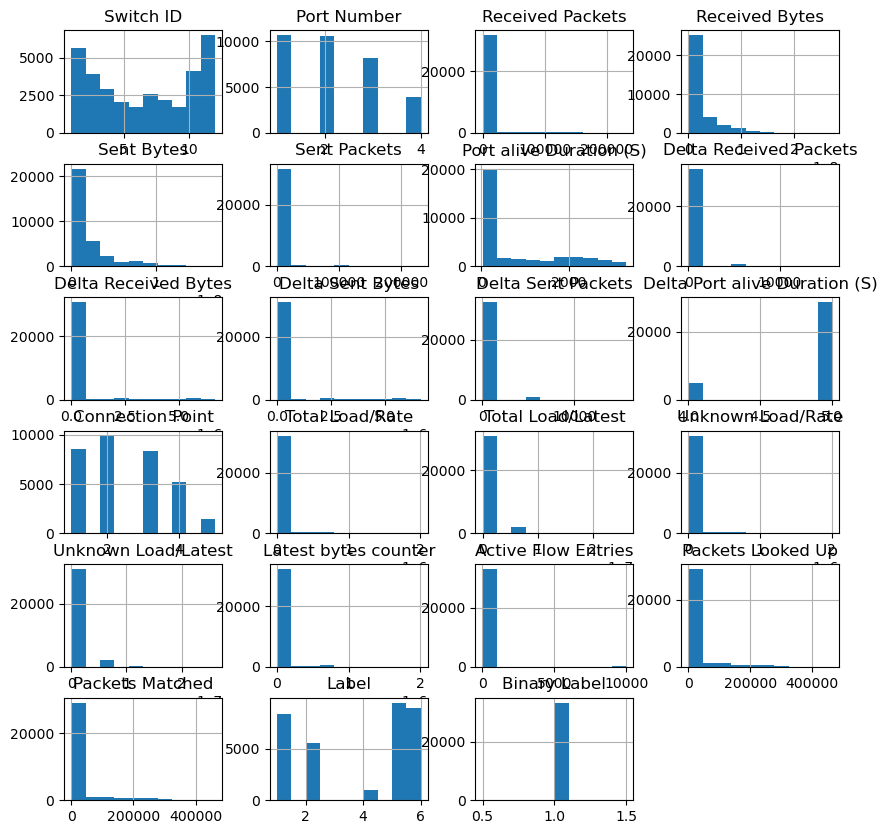

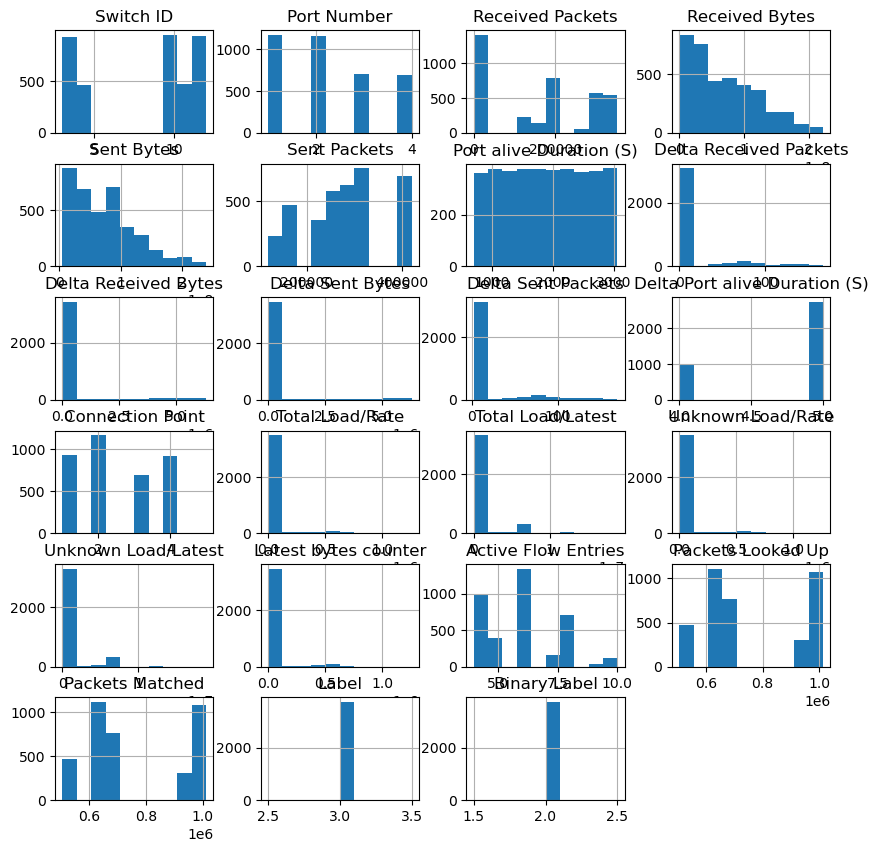

In [7]:
#Have a look on Binary Label and variable features
#Switch ID, Received Packets, Received Bytes, Port alive duration, Packets machted, Packets Looked Up, Active Flow Entries,, Delta Sent Packets
#The features are looking different if Attack = 1 or Normal = 2 
#Upper histograms = attack
#Lower histograms = normal
df.groupby("Binary Label").hist(figsize=[10,10], layout=[6,4])